## Create semantic label from spike's json file

In [23]:
import json
import os
import glob
import cv2
import numpy as np
from pycocotools import mask as maskUtils
import matplotlib.pyplot as plt

In [2]:
classes = {"up":1, "down":2, "background":3}

In [3]:
def create_mask_fromjson(json_data,classes):
    shapes = json_data['shapes']
    W = json_data['imageWidth']
    H = json_data['imageHeight']
    
    
    masks = np.zeros((H,W),dtype=np.uint8)
    for shape in shapes:
        label_value = classes[shape['label']]
        seg = [np.asarray(shape['points']).flatten().tolist()]
        rles = maskUtils.frPyObjects(seg, H, W)
        rle = maskUtils.merge(rles)
        mask = maskUtils.decode(rle)
        mask[mask !=0] = label_value
        masks = np.add(mask, masks) # spikes mask
        #masks = np.logical_or(mask, masks) # spikes mask
    
    return masks
    

In [4]:
barley_classes = {'seed':1, "background":2}
fixed_class = 'seed'

In [8]:
# This if for barley malt project. Because in the labelme json, there have two classes, now needs be changed to only one class.
# But we don't want to change labelme json files, So here set a fixed value.

def create_mask_fromjson_forBarleyMalt(json_data,fixed_class,my_classes):
    shapes = json_data['shapes']
    W = json_data['imageWidth']
    H = json_data['imageHeight']
    
    
    masks = np.zeros((H,W),dtype=np.uint8)
    for shape in shapes:
        label_value = my_classes[fixed_class]
        seg = [np.asarray(shape['points']).flatten().tolist()]
        rles = maskUtils.frPyObjects(seg, H, W)
        rle = maskUtils.merge(rles)
        mask = maskUtils.decode(rle)
        mask[mask !=0] = label_value
        masks = np.add(mask, masks) # spikes mask
        #masks = np.logical_or(mask, masks) # spikes mask
    
    return masks

In [4]:
train_dir = "e:/temp/barley_malt/train/"
#dst_dir = "e:/temp/barley_malt/train/segm_twoclass/"
dst_dir = "e:/temp/barley_malt/train/segm_oneclass/"

In [ ]:
train_dir = "E:/2020_barley/barley_more/iter1/"
dst_dir = "E:/2020_barley/barley_more/iter1/segm/"

In [3]:
train_dir = "E:/2020_barley/barley_less/iter1/train/"
dst_dir = "E:/2020_barley/barley_less/iter1/train/segm/"

In [3]:
# 说明：这里把 less iter1 下的 val 里面的图片，也生成 segm mask，是为了把 train 和 val 里面的图片合在一起，增加样本量，
# 来train 一个模型，然后用来 Infer ，看看效果

val_dir = "E:/2020_barley/barley_less/iter1/val/"
dst_dir = "E:/2020_barley/barley_less/iter1/val/segm/"

# 用于生成病斑的 Segm 分支的 label
spike_train_json_dir = 'E:/disease_segm/train_hsv_json/'
dst_dir = 'E:/disease_segm/train_hsv_segm/'

#病斑的原始标注的 Segm 分支的label
spike_train_json_dir = 'E:/mytmp/g_drv/train_json/'
dst_dir = 'E:/mytmp/g_drv/train_spike_segm/'

In [36]:
json_files = glob.glob(train_dir + "*.json")
#json_files = glob.glob(val_dir + "*.json")

In [25]:
for json_file in json_files:
    break

In [26]:
json_file

'e:/temp/barley_malt/train\\DSC_2902_v.json'

In [14]:
file_name = json_file.split(".")[0]
img_file = file_name + ".jpg"
json_data = json.load(open(json_file,"r"))

shapes = json_data['shapes']
W = json_data['imageWidth']
H = json_data['imageHeight']

masks = np.zeros((H,W),dtype=np.uint8)
for shape in shapes:
    label_value = classes[shape['label']]
    seg = [np.asarray(shape['points']).flatten().tolist()]
    rles = maskUtils.frPyObjects(seg, H, W)
    rle = maskUtils.merge(rles)
    mask = maskUtils.decode(rle)
    mask[mask !=0] = label_value
    masks = np.add(mask, masks) # spikes mask
    



In [42]:
classes[shape['label']]

1

In [44]:
masks.max()

40

In [22]:
mask[mask !=0] = 10
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
#mask[mask !=0] = label_value

masks[masks == 0] = 3

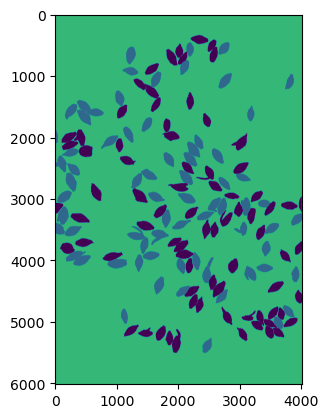

In [17]:
plt.imshow(masks)
plt.show()

In [55]:
spikes_mask = create_mask_fromjson(json_data,classes)
masks_b = np.logical_not(spikes_mask)  # mask for background

W = json_data['imageWidth']  # 4000
H = json_data['imageHeight']  #6000

# the mask shape is (w,h), only one channel
#spike_img = np.zeros((W,H), dtype=np.uint8)
mask_b_img = np.zeros((H,W), dtype=np.uint8)

mask_b_img[:,:] = classes['background'] #1 #123 # set gray for backgroud

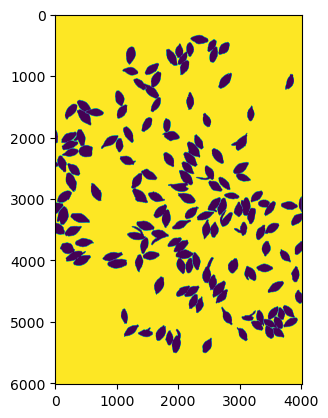

In [57]:
plt.imshow(masks_b)
plt.show()

In [ ]:
#mask = (spikes_mask ==0)
#spike_img[mask] = 0

mask = (masks_b == 0)
mask_b_img[mask] = 0

#final_mask = spike_img + mask_b_img
final_mask = mask_b_img

target_name = os.path.basename(file_name)
target_name = dst_dir + target_name + '.png'
cv2.imwrite(target_name, final_mask)
print("output " + target_name)

file_num = 0
for json_file in json_files:
    file_name = json_file.split(".")[0]
    img_file = file_name + ".jpg"
    json_data = json.load(open(json_file,"r"))
    
    spikes_mask = create_mask_fromjson(json_data)
    masks_b = np.logical_not(spikes_mask)  # mask for background
    
    W = json_data['imageWidth']  # 4000
    H = json_data['imageHeight']  #6000
    
    # the mask shape is (w,h), only one channel
    #spike_img = np.zeros((W,H), dtype=np.uint8)
    mask_b_img = np.zeros((H,W), dtype=np.uint8)
    
    mask_b_img[:,:] = classes['background'] #1 #123 # set gray for backgroud

    
    #mask = (spikes_mask ==0)
    #spike_img[mask] = 0

    mask = (masks_b == 0)
    mask_b_img[mask] = 0
    
    #final_mask = spike_img + mask_b_img
    final_mask = mask_b_img
    
    target_name = os.path.basename(file_name)
    target_name = dst_dir + target_name + '.png'
    cv2.imwrite(target_name, final_mask)
    print("output " + target_name)
    file_num +=1
    break

print("Total generate {} files".format(file_num))
    


In [5]:
barley_classes = {'seed':1, "background":2}
fixed_class = 'seed'

In [6]:
json_files = glob.glob(train_dir + "*.json")

In [6]:
train_1_jsons = glob.glob(r'E:\Temp\barley_malt\single_seeds\mini_train_set_single1\*.json')
train_2_jsons = glob.glob(r'E:\Temp\barley_malt\single_seeds\mini_train_set_single2\*.json')
train_3_jsons = glob.glob(r'E:\Temp\barley_malt\single_seeds\mini_train_set_single3\*.json')
train_jsons = train_1_jsons + train_2_jsons + train_3_jsons
len(train_jsons)

1277

In [11]:
seeds_malt_classes = {"0":1,"1":1, "2":1, "3":1, "4":1, "acrospire":1}
fixed_class = "1"

In [12]:
json_files = train_jsons

In [13]:
dst_dir = "e:/temp/barley_malt/single_seeds/train_segm_png/"

In [15]:
img_file

'E:\\Temp\\barley_malt\\single_seeds\\mini_train_set_single3\\IMG_20221012_154255_042.jpg'

In [14]:
file_num = 0
for json_file in json_files:
    file_name = json_file.split(".")[0]
    img_file = file_name + ".jpg"
    json_data = json.load(open(json_file,"r"))
    
    # For spike 
    #spikes_mask = create_mask_fromjson(json_data, classes)
    
    #For barley malt only one class
    spikes_mask = create_mask_fromjson_forBarleyMalt(json_data,fixed_class,seeds_malt_classes)

    
    # Set the background as largest value. And the first class start from 0
    spikes_mask[spikes_mask == 0] = barley_classes['background']
    spikes_mask -= 1
    target_name = os.path.basename(file_name)
    target_name = dst_dir + target_name + '.png'
    cv2.imwrite(target_name, spikes_mask)
    print("output " + target_name)
    file_num +=1
    

print("Total generate {} files".format(file_num))
    


output e:/temp/barley_malt/single_seeds/train_segm_png/1102_5_000.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_5_004.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_5_008.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_5_009.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_5_010.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_5_011.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_5_012.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_5_017.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_5_019.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_5_020.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_5_021.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_5_032.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_5_033.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_5_035.png
output e:/temp/barle

output e:/temp/barley_malt/single_seeds/train_segm_png/1117_oo_003.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_oo_004.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_oo_005.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_oo_006.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_oo_008.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_oo_011.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_oo_012.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_oo_016.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_oo_017.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_oo_018.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_oo_019.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_oo_022.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_oo_024.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_oo_026.png
output

output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154122_116.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154122_117.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154122_118.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154122_119.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154122_120.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154122_121.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154122_122.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154122_123.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154122_124.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154122_130.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154122_131.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154122_132.png
outp

output e:/temp/barley_malt/single_seeds/train_segm_png/1102_11_157.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_11_158.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_11_159.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_11_163.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_11_164.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_11_166.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_11_167.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_11_171.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_11_172.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_11_186.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_11_187.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_19_000.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_19_002.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1102_19_007.png
output

output e:/temp/barley_malt/single_seeds/train_segm_png/1110_33_069.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_33_078.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_33_079.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_33_080.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_33_081.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_33_082.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_33_083.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_33_084.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_33_085.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_33_091.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_33_093.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_33_094.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_33_095.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_33_110.png
output

output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154629_112.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154629_113.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154629_120.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154629_121.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154629_124.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154629_125.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154629_126.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154629_127.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154629_135.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154629_136.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154629_137.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154629_147.png
outp

output e:/temp/barley_malt/single_seeds/train_segm_png/1110_333_146.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_333_147.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_333_149.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_333_150.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_333_152.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_333_156.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_333_159.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_333_163.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_oooo_001.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_oooo_002.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_oooo_004.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_oooo_005.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110_oooo_006.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1110

output e:/temp/barley_malt/single_seeds/train_segm_png/1117_3_011.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_3_015.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_3_016.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_3_020.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_3_023.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_3_025.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_3_028.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_3_030.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_3_032.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_3_034.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_3_036.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_3_040.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_3_042.png
output e:/temp/barley_malt/single_seeds/train_segm_png/1117_3_045.png
output e:/temp/barle

output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154255_000.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154255_006.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154255_007.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154255_008.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154255_009.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154255_011.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154255_020.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154255_021.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154255_023.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154255_024.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154255_025.png
output e:/temp/barley_malt/single_seeds/train_segm_png/IMG_20221012_154255_026.png
outp

In [13]:
spikes_mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

TypeError: Image data of dtype object cannot be converted to float

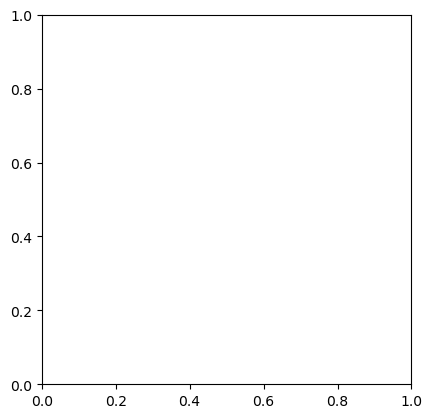

In [22]:
png_file = cv2.imread("E:\mytmp\g_drv\train_spike_segm\0047_wheat_disease_6.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(png_file)
plt.show()

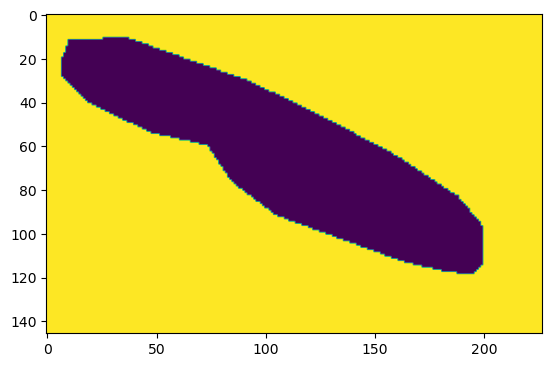

In [21]:
plt.imshow(spikes_mask)
plt.show()

In [13]:
png_file.shape

(4000, 6000)

In [14]:
png_file[3550:3570, 10:20]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
os.path.basename(file_name)